TASK : SALES PREDICTION USING PYTHON
    
   Author : Navya
       
   Batch :January
            
   Domain : Data Science
            

IMPORTING IMPORTANT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv(r"C:\Users\Navya\Downloads\Walmart_Store_sales.csv")

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


AIM : Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as 
    advertising expenditure, target audience segmentation, and advertising platform selection

In [5]:
df.shape

(6435, 8)

In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### BASIC observation
Avg expense spend is lowest on Radio
Avg expense spend is lowest on Radio
Max sale is 14 and min is 3.8


C:\Users\Navya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


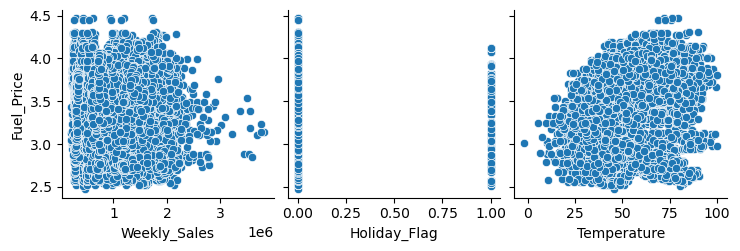

In [15]:
sns.pairplot(df, x_vars=['Weekly_Sales', 'Holiday_Flag', 'Temperature'], y_vars='Fuel_Price', kind ='scatter')
plt.show()

<Axes: ylabel='Frequency'>

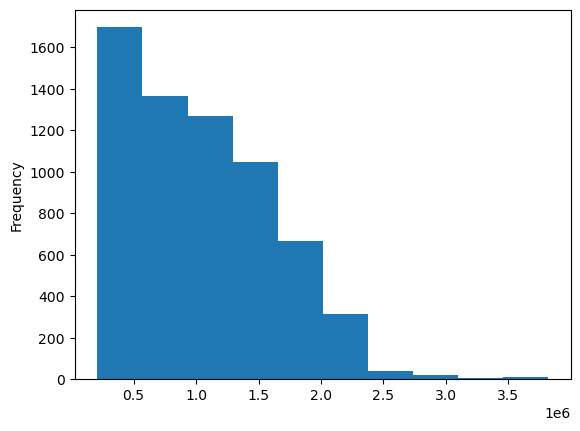

In [16]:
df['Weekly_Sales'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

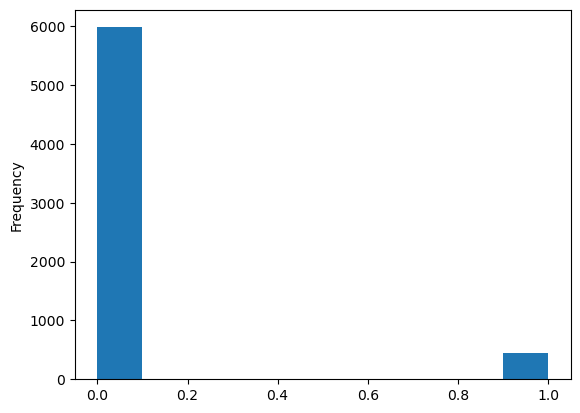

In [19]:
df['Holiday_Flag'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

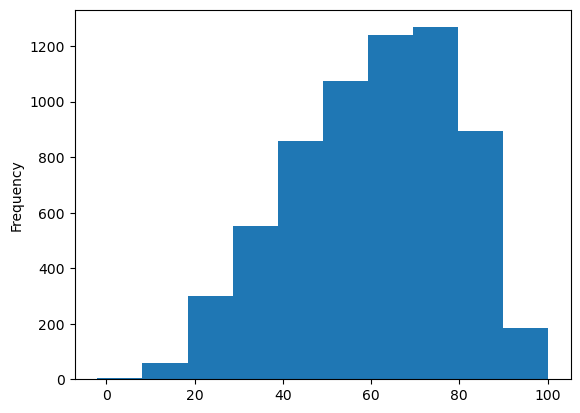

In [21]:
df['Temperature'].plot.hist(bins=10)

Lets train our model using linear regresion as it correlated with only one variable Weekly_Sales

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Weekly_Sales']], df[['Fuel_Price']], test_size = 0.3,random_state=0)

In [11]:
print(x_train)

      Weekly_Sales
636      307291.56
420      408838.73
3605    1037549.71
6292     890689.51
245     1711769.11
...            ...
4931     955466.84
3264    1321914.34
1653     966817.24
2607    1318343.58
2732    1893736.90

[4504 rows x 1 columns]


In [12]:
print(y_train)

      Fuel_Price
636        3.810
420        3.638
3605       2.735
6292       2.784
245        3.268
...          ...
4931       3.922
3264       3.947
1653       3.743
2607       2.837
2732       2.958

[4504 rows x 1 columns]


In [13]:
print(x_test)

      Weekly_Sales
3949    1220984.94
4555    1246322.44
2235     505918.21
5204     527572.25
3524     719235.07
...            ...
2265     518045.09
1284     558464.80
658      292315.38
1329    2939946.38
4285     425410.04

[1931 rows x 1 columns]


In [14]:
print(y_test)

      Fuel_Price
3949       3.805
4555       3.741
2235       3.550
5204       3.288
3524       3.530
...          ...
2265       3.804
1284       3.601
658        3.355
1329       3.162
4285       3.666

[1931 rows x 1 columns]


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
res= model.predict(x_test)
print(res)

[[3.36208838]
 [3.36214538]
 [3.36047991]
 ...
 [3.35999943]
 [3.36595502]
 [3.36029882]]


In [17]:
model.coef_

array([[2.24940219e-09]])

In [18]:
model.intercept_

array([3.3593419])

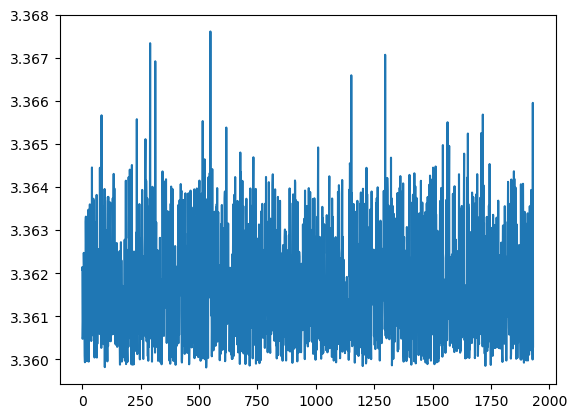

In [20]:
plt.plot(res)

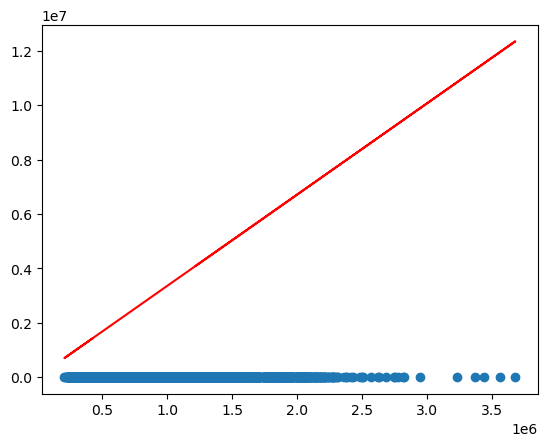

In [22]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 2.24940219e-09 + 3.3593419 * x_test, 'r')

conclusion with saying that above mention solution is succesfully able to predict the Fuel_sales using advertising platdorm dataset